In [ ]:
#default_exp data.datasets.long_horizon

# Long-Horizon Datasets

> Download and wrangling utility for long-horizon datasets.

In [ ]:
#hide
from nbdev import *
%load_ext autoreload
%autoreload 2

In [ ]:
#export
import os
from dataclasses import dataclass
from typing import Dict, List, Optional, Tuple, Union

import numpy as np
import pandas as pd

from neuralforecast.data.datasets.utils import download_file, Info

In [ ]:
#hide
from IPython.display import Image
WIDTH = 600
HEIGHT = 300

>Long-Horizon Meta Information

In [ ]:
#export
@dataclass
class ETTh1:
    """
    The ETTh1 dataset monitors an electricity transformer 
    from a region of a province of China including oil temperature 
    and variants of load (such as high useful load and high useless load) 
    from July 2016 to July 2018 at an hourly frequency.
    """
    freq: str = 'H'
    name: str = 'ETTh1'
    n_ts: int = 1
        
@dataclass
class ETTh2:
    """
    The ETTh2 dataset monitors an electricity transformer 
    from a region of a province of China including oil temperature 
    and variants of load (such as high useful load and high useless load) 
    from July 2016 to July 2018 at an hourly frequency.
    """    
    freq: str = 'H'
    name: str = 'ETTh2'
    n_ts: int = 1

@dataclass
class ETTm1:
    """
    The ETTm1 dataset monitors an electricity transformer 
    from a region of a province of China including oil temperature 
    and variants of load (such as high useful load and high useless load) 
    from July 2016 to July 2018 at a fifteen minute frequency.
    """    
    freq: str = '15T'
    name: str = 'ETTm1'
    n_ts: int = 7
        
@dataclass
class ETTm2:
    """
    The ETTm2 dataset monitors an electricity transformer 
    from a region of a province of China including oil temperature 
    and variants of load (such as high useful load and high useless load) 
    from July 2016 to July 2018 at a fifteen minute frequency.
    
        Reference:
        Zhou, et al. Informer: Beyond Efficient Transformer 
        for Long Sequence Time-Series Forecasting. AAAI 2021.
        https://arxiv.org/abs/2012.07436
    """
    freq: str = '15T'
    name: str = 'ETTm2'
    n_ts: int = 7

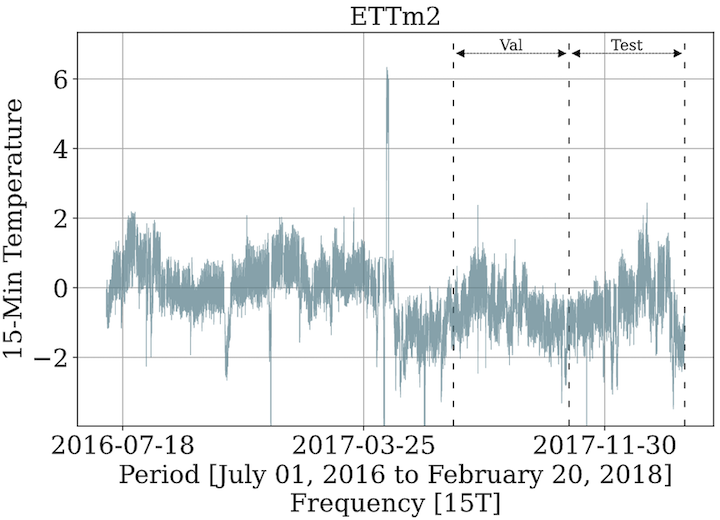

In [ ]:
#hide_input
ett_image = Image(filename='benchm_imgs/ETT.png', width=WIDTH, height=HEIGHT)
ett_image

In [ ]:
#export    
@dataclass
class ECL:
    """
    The Electricity dataset reports the fifteen minute electricity 
    consumption (KWh) of 321 customers from 2012 to 2014. 
    For comparability, we aggregate it hourly.
    
        Reference:
        Li, S et al. Enhancing the locality and breaking the memory 
        bottleneck of Transformer on time series forecasting.
        NeurIPS 2019. http://arxiv.org/abs/1907.00235.
    """
    freq: str = '15T'
    name: str = 'ECL'
    n_ts: int = 321

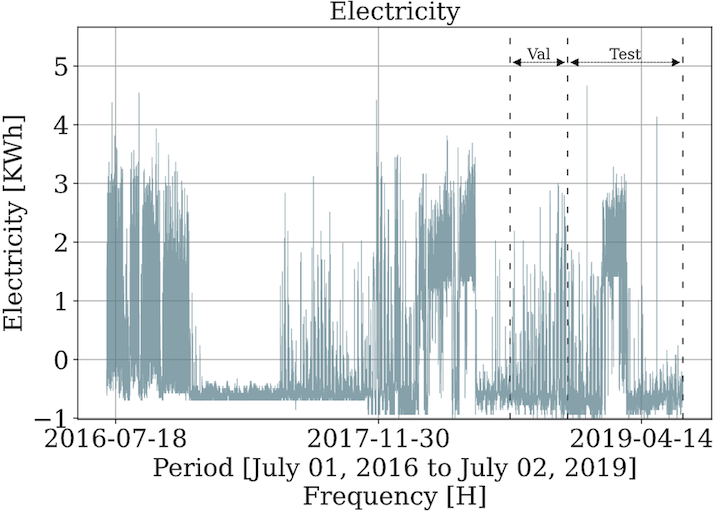

In [ ]:
#hide_input
ecl_image = Image(filename='benchm_imgs/ECL.png', width=WIDTH, height=HEIGHT)
ecl_image

In [ ]:
#export
@dataclass
class Exchange:
    """
    The Exchange dataset is a collection of daily exchange rates of 
    eight countries relative to the US dollar. The countries include 
    Australia, UK, Canada, Switzerland, China, Japan, New Zealand and 
    Singapore from 1990 to 2016.

        Reference:
        Lai, G., Chang, W., Yang, Y., and Liu, H. Modeling Long and
        Short-Term Temporal Patterns with Deep Neural Networks.
        SIGIR 2018. http://arxiv.org/abs/1703.07015.
    """
    freq: str = 'D'
    name: str = 'Exchange'
    n_ts: int = 8

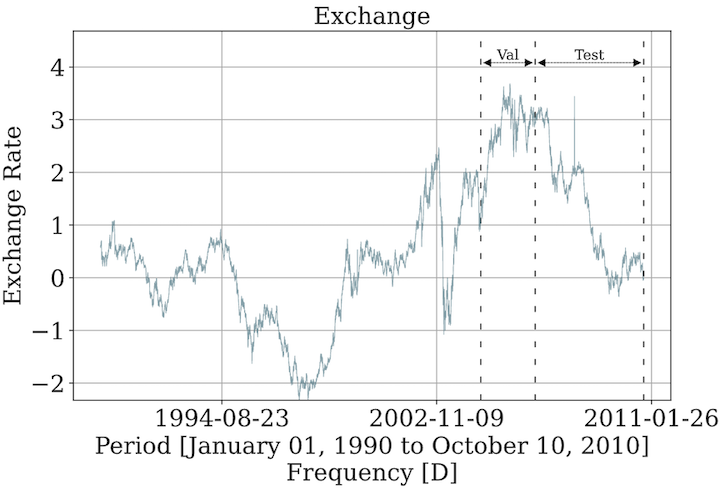

In [ ]:
#hide_input
exchange_image = Image(filename='benchm_imgs/Exchange.png', width=WIDTH, height=HEIGHT)
exchange_image

In [ ]:
#export
@dataclass
class TrafficL:
    """
    This large Traffic dataset was collected by the California Department 
    of Transportation, it reports road hourly occupancy rates of 862 sensors, 
    from January 2015 to December 2016.
    
        Reference:
        Lai, G., Chang, W., Yang, Y., and Liu, H. Modeling Long and
        Short-Term Temporal Patterns with Deep Neural Networks.
        SIGIR 2018. http://arxiv.org/abs/1703.07015.
        
        Wu, H., Xu, J., Wang, J., and Long, M. Autoformer:
        Decomposition Transformers with auto-correlation for
        long-term series forecasting. NeurIPS 2021. 
        https://arxiv.org/abs/2106.13008.        
    """
    freq: str = 'H'
    name: str = 'traffic'
    n_ts: int = 862

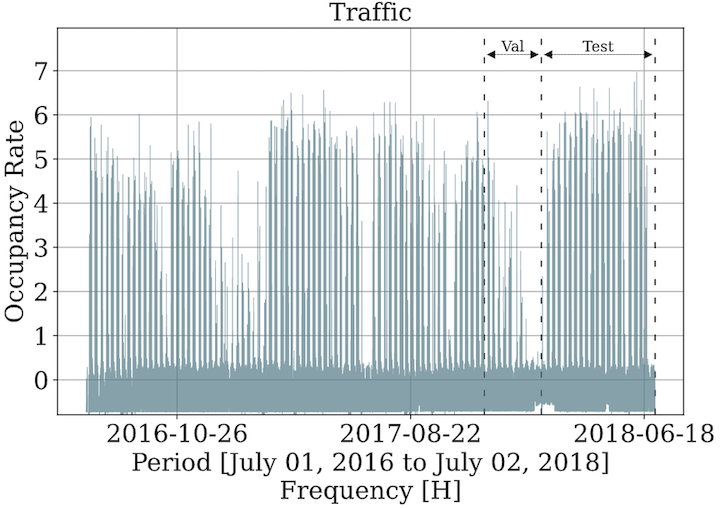

In [ ]:
#hide_input
trafficl_image = Image(filename='benchm_imgs/TrafficL.png', width=WIDTH, height=HEIGHT)
trafficl_image

In [ ]:
#export
@dataclass
class ILI:
    """
    This dataset reports weekly recorded influenza-like illness (ILI) 
    patients from Centers for Disease Control and Prevention of the 
    United States from 2002 to 2021. It is measured as a ratio of ILI 
    patients versus the total patients in the week.
    
        Reference:
        Wu, H., Xu, J., Wang, J., and Long, M. Autoformer:
        Decomposition Transformers with auto-correlation for
        long-term series forecasting. NeurIPS 2021. 
        https://arxiv.org/abs/2106.13008.    
    """
    freq: str = 'W'
    name: str = 'ili'
    n_ts: int = 7

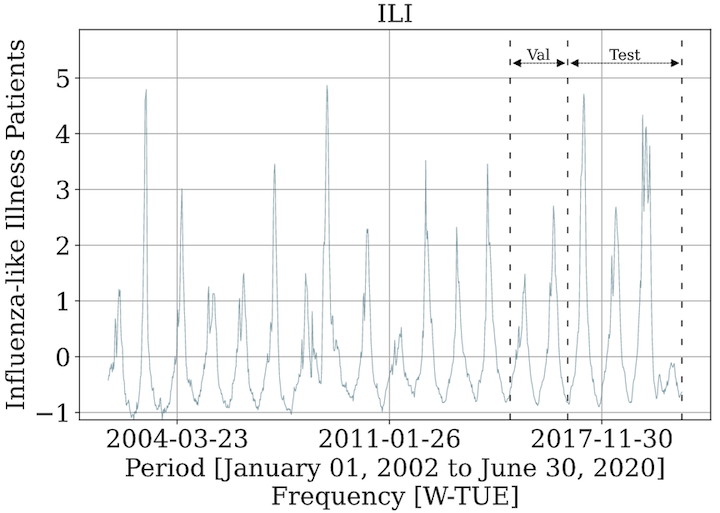

In [ ]:
#hide_input
ili_image = Image(filename='benchm_imgs/ILI.png', width=WIDTH, height=HEIGHT)
ili_image

In [ ]:
#export
@dataclass
class Weather:
    """
    This Weather dataset contains the 2020 year of 21 meteorological 
    measurements
    recorded every 10 minutes from the Weather Station of the Max Planck Biogeochemistry 
    Institute in Jena, Germany.

        Reference:
        Wu, H., Xu, J., Wang, J., and Long, M. Autoformer:
        Decomposition Transformers with auto-correlation for
        long-term series forecasting. NeurIPS 2021. 
        https://arxiv.org/abs/2106.13008.
    """
    freq: str = '10M'
    name: str = 'weather'
    n_ts: int = 21

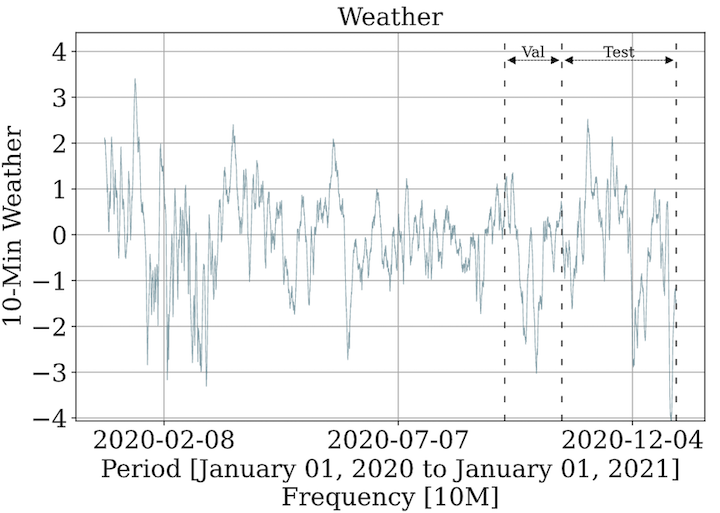

In [ ]:
#hide_input
weather_image = Image(filename='benchm_imgs/Weather.png', width=WIDTH, height=HEIGHT)
weather_image

In [ ]:
#export
LongHorizonInfo = Info(groups=(
        'ETTh1', 'ETTh2', 'ETTm1', 'ETTm2', 
        'ECL', 'Exchange', 'TrafficL', 'ILI', 'Weather'
    ),
    class_groups=(
        ETTh1, ETTh2, ETTm1, ETTm2, 
        ECL, Exchange, TrafficL, ILI, Weather
    )
)

In [ ]:
#export
@dataclass
class LongHorizon:
    """
    This Long-Horizon datasets wrapper class, provides
    with utility to download and wrangle the following datasets:    
    ETT, ECL, Exchange, Traffic, ILI and Weather.
    
    - Each set is normalized with the train data mean and standard deviation.
    - Datasets are partitioned into train, validation and test splits.
    - For all datasets: 70%, 10%, and 20% of observations are train, validation, test, 
      except ETT that uses 20% validation.  
    """
    
    source_url: str = 'https://nhits-experiments.s3.amazonaws.com/datasets.zip'

    @staticmethod
    def load(directory: str,
             group: str,
             cache: bool = True) -> Tuple[pd.DataFrame, 
                                          Optional[pd.DataFrame], 
                                          Optional[pd.DataFrame]]:
        """
        
        Downloads and long-horizon forecasting benchmark datasets.

            Parameters
            ----------
            directory: str
                Directory where data will be downloaded.
            group: str
                Group name.
                Allowed groups: 'ETTh1', 'ETTh2', 
                                'ETTm1', 'ETTm2',
                                'ECL', 'Exchange',
                                'Traffic', 'Weather', 'ILI'.
            cache: bool
                If `True` saves and loads 

            Returns
            ------- 
            y_df: pd.DataFrame
                Target time series with columns ['unique_id', 'ds', 'y'].
            X_df: pd.DataFrame
                Exogenous time series with columns ['unique_id', 'ds', 'y']. 
            S_df: pd.DataFrame
                Static exogenous variables with columns ['unique_id', 'ds']. 
                and static variables. 
        """
        if group not in LongHorizonInfo.groups:
            raise Exception(f'group not found {group}')
            
        path = f'{directory}/longhorizon/datasets'
        file_cache = f'{path}/{group}.p'
        
        if os.path.exists(file_cache) and cache:
            df, X_df, S_df = pd.read_pickle(file_cache)
            
            return df, X_df, S_df
        
        LongHorizon.download(directory)
        path = f'{directory}/longhorizon/datasets'
        
        kind = 'M' if group not in ['ETTh1', 'ETTh2'] else 'S'
        name = LongHorizonInfo[group].name
        y_df = pd.read_csv(f'{path}/{name}/{kind}/df_y.csv')
        y_df = y_df.sort_values(['unique_id', 'ds'], ignore_index=True)
        y_df = y_df[['unique_id', 'ds', 'y']]
        X_df = pd.read_csv(f'{path}/{name}/{kind}/df_x.csv')
        X_df = y_df.drop('y', axis=1).merge(X_df, how='left', on=['ds'])
       
        S_df = None
        if cache:
            pd.to_pickle((y_df, X_df, S_df), file_cache)
            
        return y_df, X_df, S_df

    @staticmethod
    def download(directory: str) -> None:
        """
        Download ETT Dataset.
        
        Parameters
        ----------
        directory: str
            Directory path to download dataset.
        """
        path = f'{directory}/longhorizon/datasets/'
        if not os.path.exists(path):
             download_file(path, LongHorizon.source_url, decompress=True)

In [ ]:
for group, meta in LongHorizonInfo:
    print(group)

group = 'ETTm2'
y_df, x_df, s_df = LongHorizon.load(directory='data', group=group, cache=False)
n_series = len(np.unique(y_df.unique_id.values))
ex_vars = x_df.columns.to_list()
ex_vars.remove('unique_id')
ex_vars.remove('ds')

display_str  = f'Group: {group} '
display_str += f'n_series: {n_series} '
print('\n' + display_str)

ETTh1
ETTh2
ETTm1
ETTm2
ECL
Exchange
TrafficL
ILI
Weather

Group: ETTm2 n_series: 7 
